In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("shared/data/bread_votes.csv")
df.head()

,demvotes,incumbent_party,repvotes,year,total_votes,incumbent_party_share,avg_recent_growth,dem_candidate,rep_candidate,winner,incumbent_victory
0,24179347,democrat,21991292,1948,46170639,0.523695,2.945063,Harry S. Truman,Thomas E. Dewey,Harry S. Truman,True
1,27375090,democrat,34075529,1952,61450619,0.445481,3.491052,Adlai Stevenson,Dwight D. Eisenhower,Dwight D. Eisenhower,False
2,26028028,republican,35579180,1956,61607208,0.577517,2.818698,Adlai Stevenson,Dwight D. Eisenhower,Dwight D. Eisenhower,True
3,34220984,republican,34108157,1960,68329141,0.499174,0.126799,John F. Kennedy,Richard Nixon,John F. Kennedy,False
4,43129040,democrat,27175754,1964,70304794,0.613458,4.391619,Lyndon B. Johnson,Barry Goldwater,Lyndon B. Johnson,True


In [24]:
print(f"Average Recent Growth Mean: {round(df['avg_recent_growth'].mean(), 2)}")
print(f"Average Recent Growth Standard Deviation: {round(df['avg_recent_growth'].std(), 2)}")
print(f"# of Rows in dataset: {len(df)}")

Average Recent Growth Mean: 2.5
Average Recent Growth Standard Deviation: 1.39
# of Rows in dataset: 19


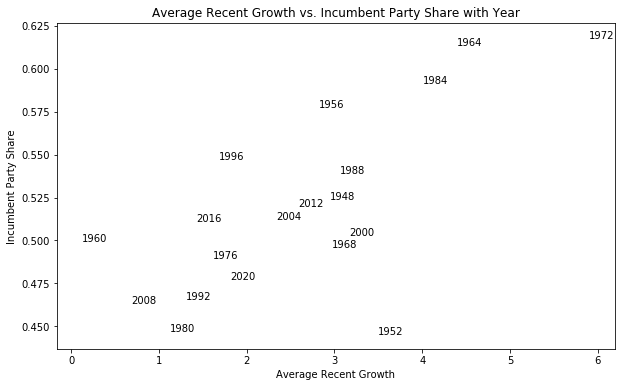

In [25]:
#Enlarge the figure size of scatter plot so years can be seen more clearly
plt.figure(figsize=(10, 6))

#iterate through rows with .iterrows(), access index and row in each iteration
for index, row in df.iterrows():
    # plotting data point corresponding to a given row, with the row's avg_recent_growth as x and incumbent_party_share as y(color white)
    plt.scatter(row['avg_recent_growth'], row['incumbent_party_share'], s=2, color='white')

    #Like in the instructions, use plt.text to display the corresponding year at the (avg recent growth, incumbent party share) coordinate. 
    plt.text(row['avg_recent_growth'], row['incumbent_party_share'], str(row['year']))

#Set Title and axes labels
plt.title('Average Recent Growth vs. Incumbent Party Share with Year')
plt.xlabel('Average Recent Growth')
plt.ylabel('Incumbent Party Share')
plt.show()

In [31]:
print(f"Average Recent Growth and Incumbent Party Share Correlation: {round(df['avg_recent_growth'].corr(df['incumbent_party_share']), 3)}")

Average Recent Growth and Incumbent Party Share Correlation: 0.697


The correlation is a positive and fairly strong, suggesting that as the value for average recent growth in personal income increases, the Incumbent Party's voting share tends to positively increase as well. Based on the visualization of the data this correlation makes sense, as the data appears to move from the bottom left to the top right of the plot. 

After a term with a significantly higher than average growth in personal income, the incumbent party tends to see an increase in voting share. My hypothesis is that voter's associate their personal economic success with the incumbent party. It is in the individuals interest to maximize growth in personal income, and if recent growth occurs during a given year one could be inclined to believe that this has to do with the policies and legislations of the incumbent party.

In [30]:
# Follow the steps executed in recitation for OLS regression with statsmodels
import statsmodels.formula.api as smf
#Use .ols(), set avg_recent_growth as independent var, incumbent_party_share as dependent var. dependent goes left of ~ independent goes right
model = smf.ols('incumbent_party_share ~ avg_recent_growth', data=df).fit()
#Use .summary() to get specific info on model like coefficient, intercept etc. 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     incumbent_party_share   R-squared:                       0.486
Model:                               OLS   Adj. R-squared:                  0.456
Method:                    Least Squares   F-statistic:                     16.08
Date:                   Tue, 05 Nov 2024   Prob (F-statistic):           0.000907
Time:                           13:25:45   Log-Likelihood:                 35.970
No. Observations:                     19   AIC:                            -67.94
Df Residuals:                         17   BIC:                            -66.05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.4526      0.019     24.456      0.000       0.414       0.492
avg_recent_growth     0.0261      0.007      4.010      0.001       0.012       0.040
==============================================================================
Omnibus:                        3.434   Durbin-Watson:                   2.486
Prob(Omnibus):                  0.180   Jarque-Bera (JB):                1.621
Skew:                          -0.646   Prob(JB):                        0.445
Kurtosis:                       3.616   Cond. No.                         6.54
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The slope is .0261, while the intercept is 0.4526. The intercept in this context represents the Incumbent Party voter share when average recent growth is zero. Essentially, if there was no growth in personal income the incumbent party could still expect a 45.26% share of votes. A slope of .0261 in this context represents the expected change when you increase the average recent growth (input) by 1 unit. 

In [32]:
# Take slope and intercept from OLS model, and plug in 2.47 value
vote_share = 0.4526 + 0.0261 * 2.47

print(f"Incumbent Party Popular Vote Share (2024): {round(vote_share, 4)}")

Incumbent Party Popular Vote Share (2024): 0.5171


This means for the 2024 election, if the avg_recent_growth value is 2.47%, the incumbent party could expect a 51.71% share of the popular votes.

In [29]:
# Use .resid to get residuals: distance between observed data and predicted data value
residuals = model.resid
 # Number of observations (n)
n = len(df)
# Calculate S/RMSE, square root of residuals squared summed, divided n - 2
s = np.sqrt(np.sum(residuals**2) / (n - 2))
# Mean of avg recent growth
x_bar = df['avg_recent_growth'].mean()
# initialize xnew, avg recent growth in 2024
xnew = 2.47
#Calculate sum of squared deviations, by taking avg_recent_growth column, subtracting it by the mean, squaring it, and summing all values. 
sum_of_squared_deviations = np.sum((df['avg_recent_growth'] - x_bar)**2)
#Follow the formula in the homework to calculate SEpred, s  times square root of 1 + 1/n + (2.47 - mean)^2 divided by sum of square deviations
SEpred = s * np.sqrt(1 + 1/n + ((xnew - x_bar)**2) / sum_of_squared_deviations)
# 95% confidence interval means two standard deviations. Multiply SEpred by 2 and -2, and add to vote_share
lower_bound = vote_share - 2 * SEpred
upper_bound = vote_share + 2 * SEpred

# Round each bound to 2 decimal places
lower_bound = round(lower_bound, 2)
upper_bound = round(upper_bound, 2)
# Return bounds
lower_bound, upper_bound

(0.44, 0.6)